In [20]:
#choose the dimension n
n=5

In [21]:
diags_list = [-1*np.ones(n-1), 2*np.ones(n), -1*np.ones(n-1)]
offsets = [-1, 0, 1]

# matrix creation
A = (1/3)*diags(diags_list, offsets).toarray()


In [22]:
tol=10e-6

sp=np.linalg.eigvals(A)
lamin=np.min(sp)
lamax=np.max(sp)

rho=2/(lamin+lamax)


u=np.array([1]*n)
b=np.array([1]*n)

In [23]:
def direction(u):
    return -(np.dot(A,u)-b)

In [33]:
def gradient_fixed_step(tol,u,max_iter):
    r=tol
    k=0
    l1=[u[0]]
    l2=[u[1]]
    while(r>=tol and k<=max_iter):
        d=direction(u)
        u_k=u+rho*direction(u)
        r=np.linalg.norm(u_k-u)
        u=u_k
        l1.append(u[0])
        l2.append(u[1])
        k=k+1
    return (l1,l2)

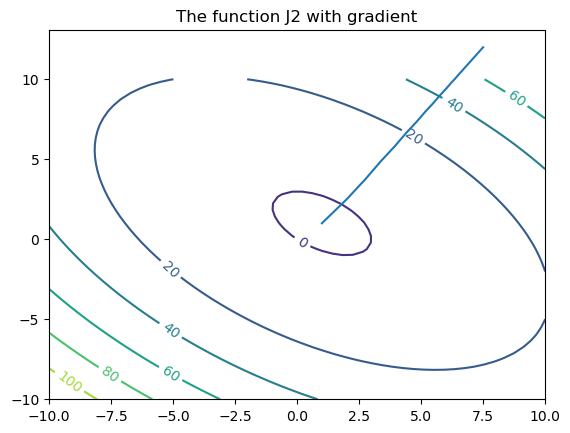

In [34]:
x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)

X,Y=np.meshgrid(x,y)

J=1/2*(A[0,0]*X**2-2*A[1,0]*X*Y+A[1,1]*Y**2)-(X+Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, J)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('The function J2 with gradient')
V=-3*X+6*Y-(1/3)*np.ones(50)
U=6*X-3*Y-(1/3)*np.ones(50)

(l1,l2)=gradient_fixed_step(tol,u,100)


                                

plt.plot(l1,l2)
plt.show()

### Error curve for the fixed-step gradient

In [35]:
def gradient_fixed_step(tol,u,max_iter):
    r=tol
    k=0
    R=[r]
    while(r>=tol and k<=max_iter):
        d=direction(u)
        u_k=u+rho*direction(u)
        r=np.linalg.norm(u_k-u)
        u=u_k
        R.append(r)
        k=k+1
    return (R)

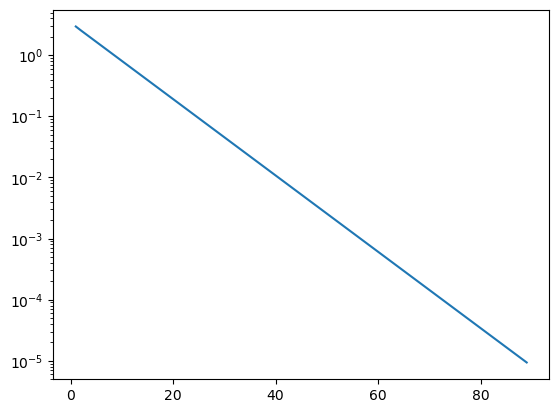

In [36]:
R=gradient_fixed_step(tol,u,100)
K=np.arange(np.size(R))
                                

plt.semilogy(K[1:],R[1:])
plt.show()

# Optimal step gradient method

In [37]:
def gradient_optimal_step(tol,u,max_iter):
    r=tol
    k=0
    l1=[u[0]]
    l2=[u[1]]
    while(r>=tol and k<=max_iter):
        d=direction(u)
        rho=(np.linalg.norm(d))**2/np.dot(d,(np.dot(A,d)))
        u_k=u+rho*direction(u)
        r=np.linalg.norm(u_k-u)
        u=u_k
        l1.append(u[0])
        l2.append(u[1])
        k=k+1
    return (l1,l2)

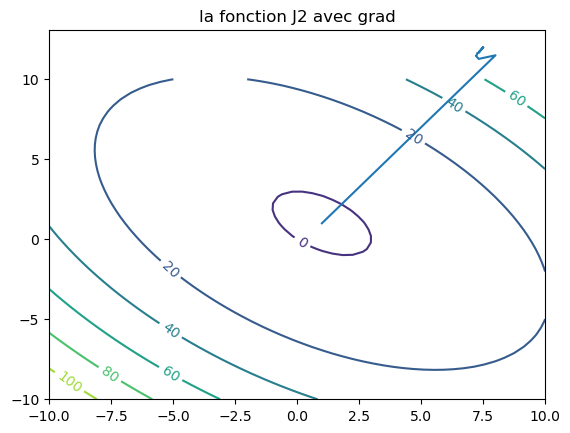

In [38]:
x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)

X,Y=np.meshgrid(x,y)

J=1/2*(A[0,0]*X**2-2*A[1,0]*X*Y+A[1,1]*Y**2)-(X+Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, J)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('la fonction J2 avec grad')
V=-3*X+6*Y-(1/3)*np.ones(50)
U=6*X-3*Y-(1/3)*np.ones(50)

(l1,l2)=gradient_optimal_step(tol,u,100)


                                

plt.plot(l1,l2)
plt.show()

### Error curve for the optimal step gradient


In [39]:
def gradient_optimal_step(tol,u,max_iter):
    r=tol
    k=0
    R=[r]
  
    while(r>=tol and k<=max_iter):
        d=direction(u)
        rho=(np.linalg.norm(d))**2/np.dot(d,(np.dot(A,d)))
        u_k=u+rho*direction(u)
        r=np.linalg.norm(u_k-u)
        u=u_k
        R.append(r)
     
        k=k+1
 
    
    return (R)

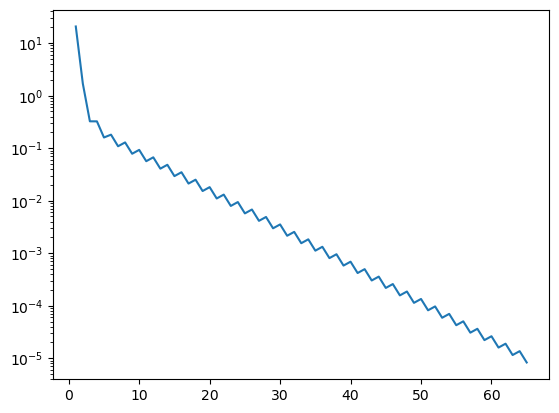

In [40]:
R=gradient_optimal_step(tol,u,100)
K=np.arange(np.size(R))
                                

plt.semilogy(K[1:],R[1:])
plt.show()

# Conjugate gradient method

In [42]:
def conjugate_gradient(A, b, u, tol):
    r0 = b - np.dot(A, u)
    p0 = r0
    x = u
    l1=[x[0]]
    l2=[x[1]]
    r = r0
    p = p0
    while np.linalg.norm(r) > tol:
        alpha = np.dot(r, r) / np.dot(p, np.dot(A, p))
        x = x + alpha * p
        rprev = r
        r = r - alpha * np.dot(A, p)
        beta = np.dot(r, r) / np.dot(rprev, rprev)
        p = r + beta * p
        l1.append(x[0])
        l2.append(x[1])
    return (l1,l2)


(l1,l2)= conjugate_gradient(A, b, u, tol)
print(l1,l2)


[1, 8.0, 7.666666666666666, 7.499999999999999] [1, 11.5, 11.833333333333334, 12.0]


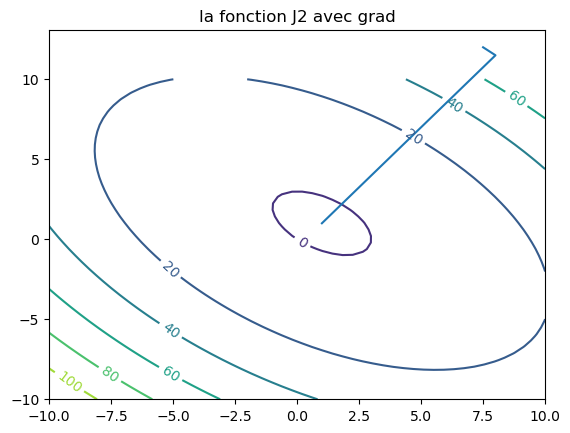

In [43]:
x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)

X,Y=np.meshgrid(x,y)

J=1/2*(A[0,0]*X**2-2*A[1,0]*X*Y+A[1,1]*Y**2)-(X+Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, J)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('la fonction J2 avec grad')
V=-3*X+6*Y-(1/3)*np.ones(50)
U=6*X-3*Y-(1/3)*np.ones(50)

(l1,l2)=conjugate_gradient(A, b, u, tol)


                                

plt.plot(l1,l2)
plt.show()

### Error curve for the conjugate gradient


In [48]:
def conjugate_gradient(A, b, u, tol, max_iter):
    r0 = b - np.dot(A, u)
    p0 = r0
    x = u
    r = r0
    p = p0
    R = [np.linalg.norm(r)]
    k = 0
    while np.linalg.norm(r) > tol and k <= max_iter:
        alpha = np.dot(r, r) / np.dot(p, np.dot(A, p))
        x = x + alpha * p
        rprev = r
        r = r - alpha * np.dot(A, p)
        beta = np.dot(r, r) / np.dot(rprev, rprev)
        p = r + beta * p
        R.append(np.linalg.norm(r))
        k += 1
    return R


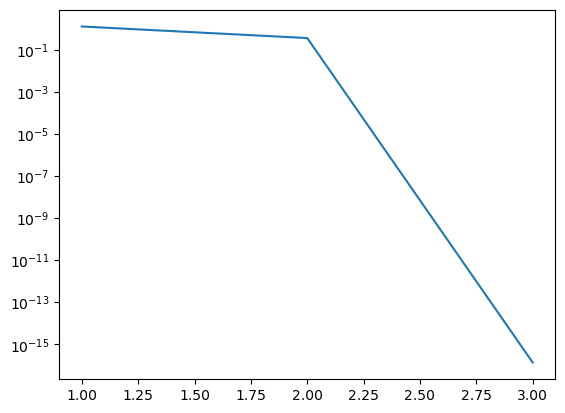

In [49]:
R=conjugate_gradient(A, b, u, tol,10)
K=np.arange(np.size(R))
                                

plt.semilogy(K[1:],R[1:])
plt.show()